# Using overlay plots (pixel maps)
Lewis Blake
lewisb@met.no

Here we present a basic tutorial on how to add overlay plots (AKA pixel maps) to an evaluation on Aeroval. Pyaerocom offers both the ability to plot model and observations as pixel maps and/or contour maps as of version 0.25.0. These selections can be made specific to each model and observation.

Let's say I have an evaluation where I want to compare EMEP model data with TROPOMI satellite data. Moreover, let's assume that the resolution of each of these data is so fine that I do not want to have the standard Aeroval evaluation as that is computationally prohibitive. (Keep in mind that by default each collocated pixel is treated as a single station, and so all statistics are computed over these `StationData` objects.) Rather, what I want is to just show the maps of both the EMEP and TROPOMI data. I need to make the following adjustments in my `CFG` dict, the main dictionary which specifies the configuration of your experiment.

In [2]:
# Model Maps
only_model_maps=True,
pages = ("maps",), 
plot_types={
    "TROPOMI": ["overlay"],
    "EMEP": ["overlay"],
},
boundaries={"west": -50, "east": 90, "south": 25.0, "north": 85.0},
right_menu = ("TROPOMI",),
overlay_save_format = "png",
maps_freq = "monthly", 

Explanation of these arguments:

- `only_model_map=True`: Tells pyaerocom to only produce maps and not do collocation. For coarser resolution data, who may want to include the full collocation and omputation of statistics, in which case this can be set to False.
- `pages = ("maps",)`: Tells the Aeroval webpage that the only page to show is the maps. Corresponds to contents of `data/contour` in the pyaeroval output. Please additionally note that all overlay maps are placed in their own directory: `data/contour/overlay`. Setting this argument is only necessary in the case assumed above, where other pages realted to the evaluation are not desired.
- `plot_types`: This is a dictionary where each key is a model or observation provided elsewhere in the config file, and the values are a list, set, or tuple, of the types of plots you wish to have. The options are `"overlay"` and `"contour"`. If not provided, the default is to make contour plots for all models.
- `boundaries`: Can be passed as a dictionary but is of type `BoundingBox`. Keys are `"west"`, `"east"`, `"north"`, `"south"` and the values are the bounding box edges in degrees. Note that this must be consistent across all models and observation networks.
- `right_menu`: Tell Aeroval which of the model or observations to play in the right menu when comparing the maps. In this case the EMEP model maps will appear on the left and the TROPOMI data will appear on the right. Please see the image below for an example.
- `overlay_save_format`: Overlay maps can be saved as either png files or webp files. The options are `"webp"` and `"png"` and the default is `"webp"`.
- `maps_freq`: This is the frequency of which to sample the data the make the maps, either overlay or contour. The default is `"coarsest"`, but it is recommended to set this explictly.


Note that specifying the colormap of an overlay is not necessary, as this can be adjusted on the fly Aeroval.

![Screenshot from 2025-01-23 13-45-16.png](<attachment:Screenshot from 2025-01-23 13-45-16.png>)
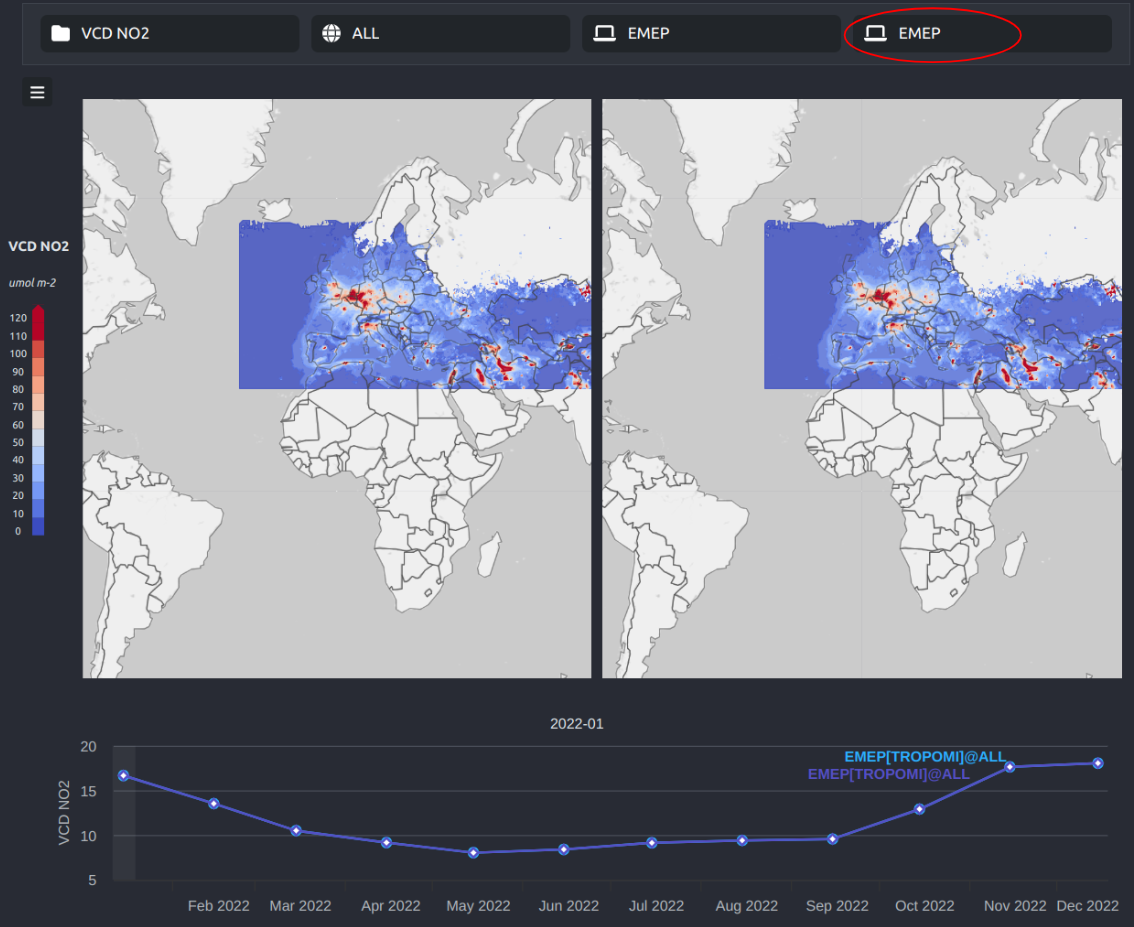